In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
from mpl_toolkits.basemap import Basemap

In [2]:
#Uploading the CSV file
df = pd.read_csv("C:\\Users\\lavle\\Desktop\\Open food facts.csv", encoding = 'utf8')
#Remove products which do not have any product code(key field)
df  = df[df.code.isnull() == False]
df.isnull().sum()
df.head()

C:\Users\lavle\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087.0,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blÃ© noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530.0,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0
2,4559.0,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,16087.0,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,16094.0,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Convert code field into interger type as it has been converted to float
df.code = df.code.astype(int)
#Conversion successful
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blÃ© noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.sort_values(by='code')
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blÃ© noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(356001, 161)

In [6]:
df = df[['code',
'created_datetime',
'last_modified_datetime',
'product_name',
'quantity',
'packaging_tags',
'brands',
'brands_tags',
'categories_en',
'origins_tags',
'manufacturing_places_tags',
'first_packaging_code_geo',
'purchase_places',
'countries_en',
'ingredients_text',
'serving_size',
'main_category_en',
'energy_100g',
'fat_100g',
'carbohydrates_100g',
'sugars_100g',
'fiber_100g',
'proteins_100g',
'calcium_100g',
'iron_100g',
'carbon-footprint_100g']]
df.shape

(356001, 26)

In [7]:
import datetime

In [8]:
df.created_datetime = pd.to_datetime(df['created_datetime'])

In [9]:
df.head()

,code,created_datetime,last_modified_datetime,product_name,quantity,packaging_tags,brands,brands_tags,categories_en,origins_tags,...,main_category_en,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,calcium_100g,iron_100g,carbon-footprint_100g
0,3087,2016-09-17 09:17:46,2016-09-17T09:18:13Z,Farine de blÃ© noir,1kg,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,2017-03-09 14:32:37,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2243.0,28.57,64.29,14.29,3.6,3.57,0.000,0.00129,NaN
2,4559,2017-03-09 14:32:37,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,...,NaN,1941.0,17.86,60.71,17.86,7.1,17.86,0.071,0.00129,NaN
3,16087,2017-03-09 10:35:31,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,...,NaN,2540.0,57.14,17.86,3.57,7.1,17.86,0.143,0.00514,NaN
4,16094,2017-03-09 10:34:13,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,...,NaN,1552.0,1.43,77.14,NaN,5.7,8.57,NaN,NaN,NaN


In [10]:
df['year'] = df['created_datetime'].dt.year
df['month'] = df['created_datetime'].dt.month
df.head()

,code,created_datetime,last_modified_datetime,product_name,quantity,packaging_tags,brands,brands_tags,categories_en,origins_tags,...,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,calcium_100g,iron_100g,carbon-footprint_100g,year,month
0,3087,2016-09-17 09:17:46,2016-09-17T09:18:13Z,Farine de blÃ© noir,1kg,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,9.0
1,4530,2017-03-09 14:32:37,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,...,28.57,64.29,14.29,3.6,3.57,0.000,0.00129,NaN,2017.0,3.0
2,4559,2017-03-09 14:32:37,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,...,17.86,60.71,17.86,7.1,17.86,0.071,0.00129,NaN,2017.0,3.0
3,16087,2017-03-09 10:35:31,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,...,57.14,17.86,3.57,7.1,17.86,0.143,0.00514,NaN,2017.0,3.0
4,16094,2017-03-09 10:34:13,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,...,1.43,77.14,NaN,5.7,8.57,NaN,NaN,NaN,2017.0,3.0


In [11]:
del df['created_datetime']

In [12]:
df.head()

,code,last_modified_datetime,product_name,quantity,packaging_tags,brands,brands_tags,categories_en,origins_tags,manufacturing_places_tags,...,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,calcium_100g,iron_100g,carbon-footprint_100g,year,month
0,3087,2016-09-17T09:18:13Z,Farine de blÃ© noir,1kg,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,9.0
1,4530,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.57,64.29,14.29,3.6,3.57,0.000,0.00129,NaN,2017.0,3.0
2,4559,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,...,17.86,60.71,17.86,7.1,17.86,0.071,0.00129,NaN,2017.0,3.0
3,16087,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,...,57.14,17.86,3.57,7.1,17.86,0.143,0.00514,NaN,2017.0,3.0
4,16094,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,...,1.43,77.14,NaN,5.7,8.57,NaN,NaN,NaN,2017.0,3.0


In [13]:
del df['last_modified_datetime']

In [14]:
df.head()

,code,product_name,quantity,packaging_tags,brands,brands_tags,categories_en,origins_tags,manufacturing_places_tags,first_packaging_code_geo,...,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,calcium_100g,iron_100g,carbon-footprint_100g,year,month
0,3087,Farine de blÃ© noir,1kg,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,9.0
1,4530,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.57,64.29,14.29,3.6,3.57,0.000,0.00129,NaN,2017.0,3.0
2,4559,Peanuts,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,...,17.86,60.71,17.86,7.1,17.86,0.071,0.00129,NaN,2017.0,3.0
3,16087,Organic Salted Nut Mix,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,...,57.14,17.86,3.57,7.1,17.86,0.143,0.00514,NaN,2017.0,3.0
4,16094,Organic Polenta,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,NaN,...,1.43,77.14,NaN,5.7,8.57,NaN,NaN,NaN,2017.0,3.0


In [15]:
df = df[df.year.isnull() == False]
df = df[df.month.isnull() == False]
df.year = df.year.astype(int)
df.month = df.month.astype(int)
df.head()

,code,product_name,quantity,packaging_tags,brands,brands_tags,categories_en,origins_tags,manufacturing_places_tags,first_packaging_code_geo,...,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,calcium_100g,iron_100g,carbon-footprint_100g,year,month
0,3087,Farine de blÃ© noir,1kg,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,9
1,4530,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.57,64.29,14.29,3.6,3.57,0.000,0.00129,NaN,2017,3
2,4559,Peanuts,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,...,17.86,60.71,17.86,7.1,17.86,0.071,0.00129,NaN,2017,3
3,16087,Organic Salted Nut Mix,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,...,57.14,17.86,3.57,7.1,17.86,0.143,0.00514,NaN,2017,3
4,16094,Organic Polenta,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,NaN,...,1.43,77.14,NaN,5.7,8.57,NaN,NaN,NaN,2017,3


In [16]:
df.shape

(356000, 26)

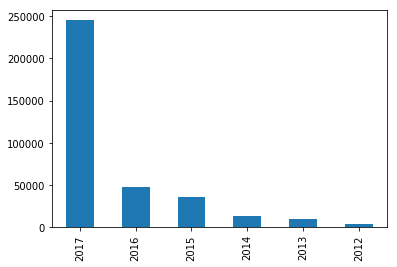

In [17]:
df['year'].value_counts().plot(kind='bar')
plt.show()

The above graph shows that the dataframe has majority of data from 2017.
So, for most visualizations, I'll be using 2015 and 2016 data as both the years have comparable data.

Let's see how plastic usage has changed over the yers from 2015 to 2017.

In [32]:
df_plastic = df[['packaging_tags', 'year', 'month']]
df_plastic

,packaging_tags,year,month
0,NaN,2016,9
1,NaN,2017,3
2,NaN,2017,3
3,NaN,2017,3
4,NaN,2017,3
5,NaN,2017,3
6,NaN,2017,3
7,NaN,2017,3
8,NaN,2017,3
9,NaN,2017,3


In [33]:
df_plastic = df_plastic[df_plastic.packaging_tags.isnull() == False]
df_plastic.head()

,packaging_tags,year,month
47,plastique,2015,6
176,frais,2017,1
177,frais,2017,1
179,"paper,plastic-film",2014,8
182,frais,2017,1


Keeping only 2015, 2016 and 2017 data in DF_PLASTIC.

In [34]:
years = ['2015', '2016', '2017']
df_plastic = df_plastic[df_plastic.year.isin(years)]
df_plastic

,packaging_tags,year,month
47,plastique,2015,6
176,frais,2017,1
177,frais,2017,1
182,frais,2017,1
183,"frais,plastique",2017,3
184,sachet-plastique,2015,9
185,"canette,metal",2015,1
186,"carton,boite",2016,5
187,frai,2017,4
188,frais,2017,1


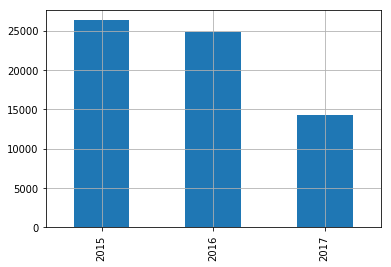

In [35]:
df_plastic['year'].value_counts().plot(kind='bar')
plt.grid()
plt.show()

In [36]:
df_plastic['year'] = df_plastic.year.astype(str)
df_plastic['year_month'] = df_plastic['year'].str.cat(df_plastic['month'].map(str), sep='-')
df_plastic

,packaging_tags,year,month,year_month
47,plastique,2015,6,2015-6
176,frais,2017,1,2017-1
177,frais,2017,1,2017-1
182,frais,2017,1,2017-1
183,"frais,plastique",2017,3,2017-3
184,sachet-plastique,2015,9,2015-9
185,"canette,metal",2015,1,2015-1
186,"carton,boite",2016,5,2016-5
187,frai,2017,4,2017-4
188,frais,2017,1,2017-1


In [37]:
df_plastic.sort_values(by='year_month', inplace=True, ascending=False)
df_plastic

,packaging_tags,year,month,year_month
242974,"conserve,metal",2017,9,2017-9
191741,"seau,plastique",2017,9,2017-9
246881,"boite-carton,sachet-et-barquette-plastique",2017,9,2017-9
246397,conserve,2017,9,2017-9
246311,"boite,carton,plastique",2017,9,2017-9
273623,"plastic,cardboard,fresh",2017,9,2017-9
186492,"frais,plastique",2017,9,2017-9
246085,"box,canned",2017,9,2017-9
312218,"bouteille,verre",2017,9,2017-9
312232,plastico,2017,9,2017-9


In [41]:
#df_plastic = df_plastic[:45000]
df_plastic.reset_index(inplace=True)
df_plastic

,index,packaging_tags,year,month,year_month
0,242974,"conserve,metal",2017,9,2017-9
1,191741,"seau,plastique",2017,9,2017-9
2,246881,"boite-carton,sachet-et-barquette-plastique",2017,9,2017-9
3,246397,conserve,2017,9,2017-9
4,246311,"boite,carton,plastique",2017,9,2017-9
5,273623,"plastic,cardboard,fresh",2017,9,2017-9
6,186492,"frais,plastique",2017,9,2017-9
7,246085,"box,canned",2017,9,2017-9
8,312218,"bouteille,verre",2017,9,2017-9
9,312232,plastico,2017,9,2017-9


In [42]:
del df_plastic['index']
df_plastic

,packaging_tags,year,month,year_month
0,"conserve,metal",2017,9,2017-9
1,"seau,plastique",2017,9,2017-9
2,"boite-carton,sachet-et-barquette-plastique",2017,9,2017-9
3,conserve,2017,9,2017-9
4,"boite,carton,plastique",2017,9,2017-9
5,"plastic,cardboard,fresh",2017,9,2017-9
6,"frais,plastique",2017,9,2017-9
7,"box,canned",2017,9,2017-9
8,"bouteille,verre",2017,9,2017-9
9,plastico,2017,9,2017-9


In [57]:
df_plasstic_2016 = df_plastic[df_plastic['year'].isin(['2016'])]
df_plasstic_2016.reset_index(inplace=True)
del df_plasstic_2016['index']
df_plasstic_2016 = df_plasstic_2016[:15000]
df_plasstic_2016

,packaging_tags,year,month,year_month
0,"carton,3-sachets-fraicheur-de-3-biscuits-de-25g",2016,9,2016-9
1,"plastique,barquette",2016,9,2016-9
2,plastique,2016,9,2016-9
3,"sachet,plastique",2016,9,2016-9
4,"barquette,plastique",2016,9,2016-9
5,plastique,2016,9,2016-9
6,"bouteille,verre",2016,9,2016-9
7,tube,2016,9,2016-9
8,"carton,plastique",2016,9,2016-9
9,"bocal,verre",2016,9,2016-9


In [58]:
df_plasstic_2015 = df_plastic[df_plastic['year'].isin(['2015'])]
df_plasstic_2015.reset_index(inplace=True)
del df_plasstic_2015['index']
df_plasstic_2015 = df_plasstic_2015[:15000]
df_plasstic_2015

,packaging_tags,year,month,year_month
0,"sachet,plastique",2015,9,2015-9
1,"bouteille,verre,bouteille",2015,9,2015-9
2,"etui-carton-a-recycler,triman,fsc-mixte",2015,9,2015-9
3,ldpe,2015,9,2015-9
4,glass,2015,9,2015-9
5,sachet,2015,9,2015-9
6,"sachet,plastique",2015,9,2015-9
7,kunststoff,2015,9,2015-9
8,"sachet,plastique,sachet",2015,9,2015-9
9,kunststoff,2015,9,2015-9


In [59]:
df_plasstic_2017 = df_plastic[df_plastic['year'].isin(['2017'])]
df_plasstic_2017.reset_index(inplace=True)
del df_plasstic_2017['index']
df_plasstic_2017 = df_plasstic_2017[:15000]
df_plasstic_2017

,packaging_tags,year,month,year_month
0,"conserve,metal",2017,9,2017-9
1,"seau,plastique",2017,9,2017-9
2,"boite-carton,sachet-et-barquette-plastique",2017,9,2017-9
3,conserve,2017,9,2017-9
4,"boite,carton,plastique",2017,9,2017-9
5,"plastic,cardboard,fresh",2017,9,2017-9
6,"frais,plastique",2017,9,2017-9
7,"box,canned",2017,9,2017-9
8,"bouteille,verre",2017,9,2017-9
9,plastico,2017,9,2017-9


In [62]:
frames = [df_plasstic_2015, df_plasstic_2016, df_plasstic_2017]
df_plastic = pd.concat(frames)
df_plastic

,packaging_tags,year,month,year_month
0,"sachet,plastique",2015,9,2015-9
1,"bouteille,verre,bouteille",2015,9,2015-9
2,"etui-carton-a-recycler,triman,fsc-mixte",2015,9,2015-9
3,ldpe,2015,9,2015-9
4,glass,2015,9,2015-9
5,sachet,2015,9,2015-9
6,"sachet,plastique",2015,9,2015-9
7,kunststoff,2015,9,2015-9
8,"sachet,plastique,sachet",2015,9,2015-9
9,kunststoff,2015,9,2015-9


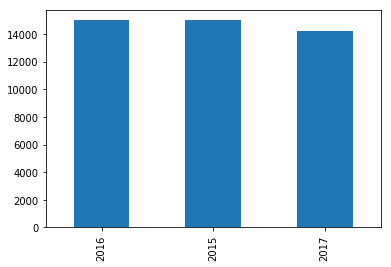

In [63]:
df_plastic['year'].value_counts().plot(kind='bar')
plt.show()

In [65]:
df_plastic['year_month'] = pd.to_datetime(df_plastic['year_month'])
df_plastic

,packaging_tags,year,month,year_month
0,"sachet,plastique",2015,9,2015-09-01
1,"bouteille,verre,bouteille",2015,9,2015-09-01
2,"etui-carton-a-recycler,triman,fsc-mixte",2015,9,2015-09-01
3,ldpe,2015,9,2015-09-01
4,glass,2015,9,2015-09-01
5,sachet,2015,9,2015-09-01
6,"sachet,plastique",2015,9,2015-09-01
7,kunststoff,2015,9,2015-09-01
8,"sachet,plastique,sachet",2015,9,2015-09-01
9,kunststoff,2015,9,2015-09-01


In [66]:
search = ['plastique', 'plastic']
df_plastic.reset_index(drop=True, inplace=True)
df_plastic = df_plastic[df_plastic.packaging_tags.isnull() == False]
df_plastic['packaging_tags'] = df_plastic[df_plastic['packaging_tags'].str.contains('|'.join(search))]
df_plastic

,packaging_tags,year,month,year_month
0,"sachet,plastique",2015,9,2015-09-01
1,NaN,2015,9,2015-09-01
2,NaN,2015,9,2015-09-01
3,NaN,2015,9,2015-09-01
4,NaN,2015,9,2015-09-01
5,NaN,2015,9,2015-09-01
6,"sachet,plastique",2015,9,2015-09-01
7,NaN,2015,9,2015-09-01
8,"sachet,plastique,sachet",2015,9,2015-09-01
9,NaN,2015,9,2015-09-01


In [67]:
df_plastic = df_plastic[df_plastic.packaging_tags.isnull() == False]
df_plastic

,packaging_tags,year,month,year_month
0,"sachet,plastique",2015,9,2015-09-01
6,"sachet,plastique",2015,9,2015-09-01
8,"sachet,plastique,sachet",2015,9,2015-09-01
10,plastic,2015,9,2015-09-01
12,"tubes,plastique,etui,carton",2015,9,2015-09-01
13,"cup,aluminium,plastique,cup",2015,9,2015-09-01
16,"sachet,plastique,sous-atmosphere-protectrice",2015,9,2015-09-01
17,"bouteille,plastique",2015,9,2015-09-01
18,"plastic,jar",2015,9,2015-09-01
22,"barquette,plastique,assiette",2015,9,2015-09-01


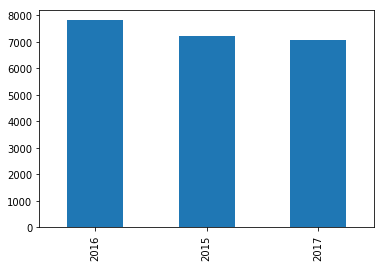

In [68]:
df_plastic['year'].value_counts().plot(kind='bar')
plt.show()

In [73]:
df_plastic.reset_index(drop=True, inplace=True)
df_plastic.sort_values(by='year_month', inplace=True)
df_plastic

C:\Users\lavle\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,packaging_tags,year,month,year_month
6552,"papier,carton,plastique",2015,3,2015-03-01
6387,"carton,briquette-individuelle,aluminium,pot-pl...",2015,3,2015-03-01
6388,"flacon,plastique",2015,3,2015-03-01
6389,"carton,plastique",2015,3,2015-03-01
6390,plastic-resealable,2015,3,2015-03-01
6391,plastic,2015,3,2015-03-01
6392,plastic,2015,3,2015-03-01
6393,plastic,2015,3,2015-03-01
6394,"plastique,barquette",2015,3,2015-03-01
6395,plastic,2015,3,2015-03-01


In [74]:
use_date = df_plastic.groupby(['year', 'month'])['year'].count()
use_date

year  month
2015  3        1244
      4        1555
      5        1088
      6         984
      7         849
      8         833
      9         670
2016  3        1004
      4        1673
      5        1969
      6         711
      7         545
      8         471
      9        1443
2017  1         738
      2        1283
      3         813
      4        1015
      5         805
      6         771
      7         633
      8         671
      9         331
Name: year, dtype: int64

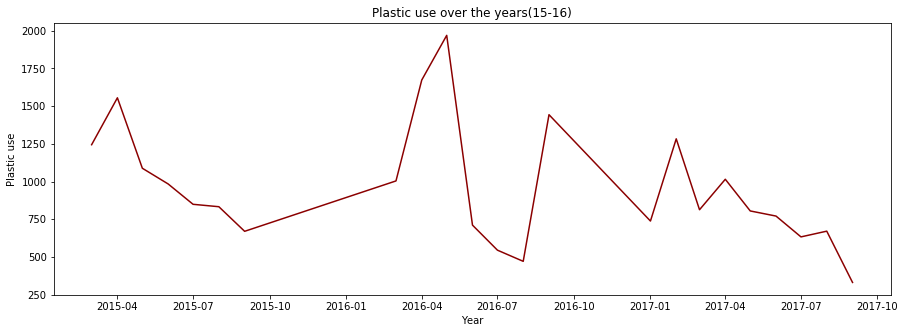

In [75]:
count = use_date.to_frame(name='count').reset_index()
# Figure 
plt.figure(figsize=(15, 5))
plt.plot(df_plastic.year_month.unique(), count['count'], '-',color ='darkred')
plt.ylabel('Plastic use')
plt.xlabel('Year')
plt.title('Plastic use over the years(15-16)')
plt.show()

The figure above shows how the plastic usage has decreased so far from 2015 to 2017.